In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:

# 1. Create Dataset
data = {
    'Pregnancies': [6, 1, 8, 1, 0, 5, 3, 10, 2, 8, 4, 10, 10, 1, 5, 7, 0, 7, 1, 1,
                    3, 8, 7, 9, 11, 10, 7, 1, 13, 5, 5, 3, 3, 6, 0, 2, 1, 3, 2, 1],
    'Glucose': [148, 85, 183, 89, 137, 116, 78, 115, 197, 125, 110, 168, 139, 189, 166,
                100, 118, 107, 103, 115, 126, 99, 196, 119, 143, 125, 147, 97, 145, 117,
                109, 158, 88, 92, 102, 90, 111, 180, 100, 146],
    'BloodPressure': [72, 66, 64, 66, 40, 74, 50, 0, 70, 96, 92, 74, 80, 60, 72, 0, 84,
                      74, 30, 70, 88, 84, 90, 80, 94, 70, 76, 66, 82, 92, 75, 76, 58, 92,
                      52, 78, 72, 64, 66, 56],
    'SkinThickness': [35, 29, 0, 23, 35, 0, 32, 0, 45, 0, 0, 0, 0, 23, 19, 0, 47, 0, 38,
                      30, 41, 0, 0, 35, 33, 26, 0, 0, 19, 0, 29, 36, 11, 0, 0, 0, 23, 0,
                      0, 0],
    'Insulin': [0, 0, 0, 94, 168, 0, 88, 0, 543, 0, 0, 0, 0, 846, 175, 0, 230, 0, 83,
                96, 235, 0, 0, 0, 146, 115, 0, 0, 110, 0, 0, 245, 54, 0, 0, 0, 40, 0,
                0, 0],
    'BMI': [33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.3, 30.5, 0, 37.6, 38.0, 27.1,
            30.1, 25.8, 30.0, 45.8, 29.6, 43.3, 34.6, 39.3, 35.4, 39.8, 29.0, 36.6, 31.1,
            39.4, 27.7, 22.2, 34.1, 36.0, 31.6, 24.8, 19.9, 24.7, 42.7, 29.8, 34.5, 25.0,
            29.7],
    'DiabetesPedigreeFunction': [0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134,
                                  0.158, 0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484,
                                  0.551, 0.254, 0.183, 0.529, 0.704, 0.388, 0.451, 0.263,
                                  0.254, 0.205, 0.257, 0.487, 0.245, 0.337, 0.546, 0.851,
                                  0.267, 0.188, 0.321, 0.304, 0.344, 0.271, 0.587, 0.564],
    'Age': [50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30, 34, 57, 59, 51, 32, 31, 31, 33,
            32, 27, 50, 41, 29, 51, 41, 43, 22, 57, 38, 38, 25, 22, 28, 21, 24, 35, 24,
            31, 29],
    'Outcome': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
                1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
}


In [4]:
df = pd.DataFrame(data)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               40 non-null     int64  
 1   Glucose                   40 non-null     int64  
 2   BloodPressure             40 non-null     int64  
 3   SkinThickness             40 non-null     int64  
 4   Insulin                   40 non-null     int64  
 5   BMI                       40 non-null     float64
 6   DiabetesPedigreeFunction  40 non-null     float64
 7   Age                       40 non-null     int64  
 8   Outcome                   40 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 2.9 KB


In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.duplicated().sum()
x = df.drop('Outcome', axis=1)
y = df['Outcome']

Accuracy: 37.5%
confusion_matrix: [[2 1]
 [4 1]]
classification_report:
              precision    recall  f1-score   support

           0       0.33      0.67      0.44         3
           1       0.50      0.20      0.29         5

    accuracy                           0.38         8
   macro avg       0.42      0.43      0.37         8
weighted avg       0.44      0.38      0.35         8



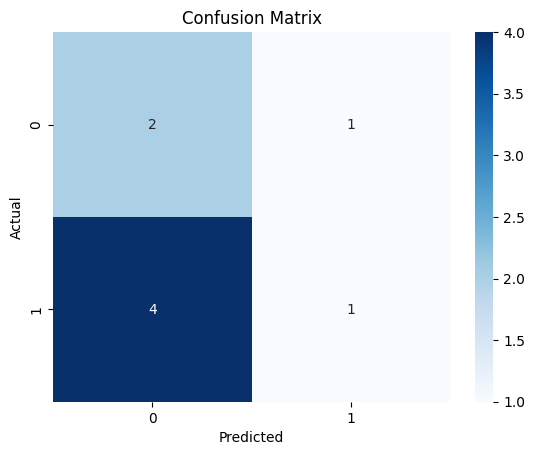

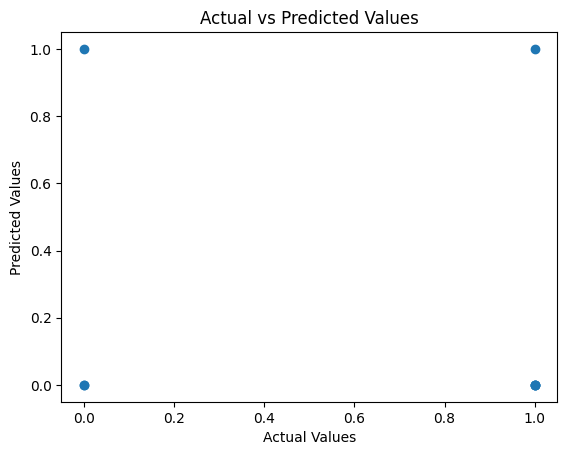

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
numerical_columns = ['Pregnancies','DiabetesPedigreeFunction','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']

x_train[numerical_columns]=scaler.fit_transform(x_train[numerical_columns])
x_test[numerical_columns]=scaler.transform(x_test[numerical_columns])


model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred) *100}%")
print(f"confusion_matrix: {confusion_matrix(y_test,y_pred)}")
print(f"classification_report:\n{classification_report(y_test, y_pred)}")
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()